# Count Inversion

[geeksforgeeks](https://www.geeksforgeeks.org/counting-inversions/)

In [1]:
import sys
import numpy as np
import random, math
import logging, argparse, yaml, copy
import matplotlib.pyplot as plt
from utils.verbose import logging_time, printProgressBar
from collections import deque

MAX = 1e10

SEED = 0
np.random.seed(seed=SEED)
random.seed(SEED)

VERBOSE = True
# setup logging
logging.basicConfig(
    format="%(asctime)s - %(message)s",
    datefmt="%m/%d/%Y %H:%M:%S",
    level=logging.INFO if VERBOSE else logging.WARNING)

## Naive Approach
$$
O(n^2)
$$

In [2]:
@logging_time
def naive(a):
    n = len(a)
    cnt = 0
    for i in range(n-1):
        for j in range(i+1, n):
            if a[i] > a[j]:
                cnt += 1
    return cnt  

In [3]:
size = 10
a = [random.randint(0,100) for _ in range(size)]
print(a)
ans, time = naive(a)
ans

[49, 97, 53, 5, 33, 65, 62, 51, 100, 38]


21

## Divide and Conquer 
### Key idea
Use **Merge Sort** and **Binary Search** to count inversions.
### Intuition
If left and right part are sorted, we can count inversion $O(nlogn)$ using binary search.
$$
T(n) = 2T(n/2) + O(nlogn)
$$

In [4]:
@logging_time
def solution(a):
    return solve(a, 0, len(a) - 1)

def solve(a, s, e):
    if s >= e: return 0
    q = (s + e) // 2
    left = solve(a, s, q)
    right = solve(a, q + 1, e)

    # count inversion
    # note that cross should be counted before merged,
    cross = 0
    for i in range(s, q + 1):
        cross += count(a, q + 1, e, a[i])

    # merge
    L = copy.deepcopy(a[s:q + 1]) + [1e10]
    R = copy.deepcopy(a[q + 1: e + 1]) + [1e10]
    i = j = 0
    for k in range(s, e + 1):
        if L[i] <= R[j]:
            a[k] = L[i]
            i += 1
        else:
            a[k] = R[j]
            j += 1

    return left + right + cross

def count(a, s, e, X):
    if s == e:
        return 1 if a[s] < X else 0
    q = (s + e) // 2
    if a[q] < X:
        return (q - s + 1) + count(a, q + 1, e, X)
    else:
        return count(a, s, q, X)

In [5]:
size = 10
a = [random.randint(0, 100) for _ in range(int(size))]
gt, t1 = naive(a)
print("before sorted: {}".format(a))
ans, t2 = solution(a)
print("after: {}".format(a))
print("gt: {}, ans: {}".format(gt, ans))
assert gt == ans

before sorted: [61, 45, 74, 27, 64, 17, 36, 17, 96, 12]
after: [12, 17, 17, 27, 36, 45, 61, 64, 74, 96]
gt: 29, ans: 29


## Divide and Conquer 

### Key idea
If we look at the merge function concisely, we can notify that it is not necessary to call binary search. <br>
When we use **merge** left and right sorted list, we can count inversions in $O(n)$.

In [6]:
@logging_time
def solution_v2(a):
    return merge(a, 0, len(a)-1)

def merge(a, s, e):
    if s >= e: return 0
    q = (s + e) // 2 
    left = merge(a, s, q)
    right = merge(a, q+1, e)
    
    cross = 0 # inversion count
    i = j = 0 # L and R index
    L = copy.deepcopy(a[s:q+1]) + [1e+10] # length q - s + 2
    R = copy.deepcopy(a[q+1:e+1]) + [1e+10] # length e - q + 1
    
    for k in range(s, e+1):
        if L[i] <= R[j]:
            a[k] = L[i]
            i += 1
        else:
            a[k] = R[j]
            j += 1
            # if i is not sentinel index, count
            if (i != (len(L)-1)):
                cross += (len(L) - 1 - i)
    return cross + left + right

In [7]:
num_exp = 100
t1, t2, t3 = [0]*num_exp, [0]*num_exp, [0]*num_exp
sizes = list(np.linspace(start=1, stop=10000, num=num_exp))
for i, size in enumerate(sizes):
    a = [random.randint(0,100) for _ in range(int(size))]
    # print("before sorted: {}".format(a))
    gt, t1[i] = naive(a)
    ans1, t2[i] = solution(copy.deepcopy(a))
    ans2, t3[i] = solution_v2(copy.deepcopy(a))
    # print("after: {}".format(a))
    assert gt == ans1 == ans2, "error {} != {} != {}, a={}".format(gt, ans1, ans2, a)
    # print("pass")
    printProgressBar(iteration=i+1, total=num_exp, msg='experiments', length=50)

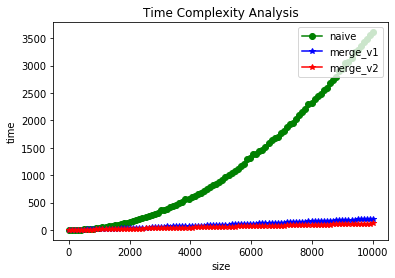

In [8]:
plt.xlabel('size')
plt.ylabel('time')
plt.title("Time Complexity Analysis")
plt.plot(sizes, t1, 'o-g', label="naive")
plt.plot(sizes, t2, '*-b', label='merge_v1')
plt.plot(sizes, t3, '*-r', label='merge_v2')
plt.legend(loc='upper right')
plt.show()

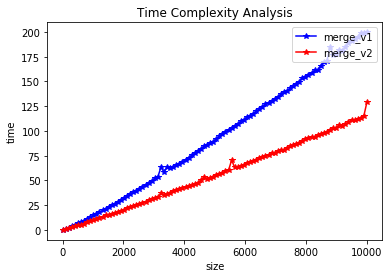

In [10]:
plt.xlabel('size')
plt.ylabel('time')
plt.title("Time Complexity Analysis")
plt.plot(sizes, t2, '*-b', label='merge_v1')
plt.plot(sizes, t3, '*-r', label='merge_v2')
plt.legend(loc='upper right')
plt.show()

As you can see in the graph, counting inversions algorithm is improved by some techniques.

# Report

이 문제는 Divide and Conquer technique을 연습할 수 있는 좋은 문제였다. 
일반적인 divide and conquer flow는 다음과 같다. 
1. 구간을 나누고 recursion을 통해 문제를 풀었다고 가정하자. (divide)
2. 구간별 솔루션들을 종합하는 과정 필요(conquer).

recursion 을 할때는 call하는 순서에서 주의 해야한다.   
그 예로, `merge_v1`에서 구현하면서 실수 헀던 점은 left와 right에 대한 call 이후, merge하기 전에 binary search를 통해
cross case를 구해야하는데, merge를 먼저 call 해버리면, left와 right의 순서가 병합되어 버리므로 binary search를 사용하는데있어 문제가 생긴다.  
(사실 merge해놓고 linear하게 search하면서 inversion을 구할 수도 있지만, binary search를 연습하기 위해서 그렇게 하지 않았다.) 
<details>
즉, divide를 통해 left와 right 가 각각 sorted 되어있있고, 그 구간내의 inversion들은 구헀다는 가정하에 
cross counversion을 구현해야했다. merge를 먼저 call하면 그 가정상황이 망가지게 된다. 
</details>